In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Project tasks:

1. To determine changes in the prevalence of SARS-CoV-2 virus variants of concern (Alpha, Delta and Omicron) in Lithuania in 2021.

2. To compare the incidence of COVID-19 disease by gender and age in Lithuania during the periods of dominance of SARS-CoV-2 virus variants of concern in 2021.

FIRST TASK

In [155]:
# A file with the data of the sequence results of the SARS-CoV-2 virus in the EU countries is opened

data = pd.read_csv('data.csv')

# From 2020-2022 EU and EEE counties' data and from two data sources (Tessy and GISAID), only Lithuanian data for 2021, data source GISAID, was selected.
variants = ((data[(data['year_week'].str.contains('2021(?!$)')) & (data['country'] == 'Lithuania') & (data['source'] == 'GISAID')])[['year_week', 'variant', 'percent_variant']]).dropna(subset=['percent_variant'])
variants[['year', 'week']]=variants['year_week'].str.split('-', expand=True)

In [156]:
variants['week'] = variants['week'].str.lstrip('0')
variants['week']=pd.to_numeric(variants['week'])

In [157]:
variants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 126303 to 128850
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_week        2548 non-null   object 
 1   variant          2548 non-null   object 
 2   percent_variant  2548 non-null   float64
 3   year             2548 non-null   object 
 4   week             2548 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 119.4+ KB



In 2021 the following SARS-CoV-2 virus variants were considered to be of concern:

1) B.1.1.7 Alpha

2) B.1.351 Beta

3) P.1 Gamma

4) B.1.617.2 Delta

5) BA.1 BA.2 BA.3 Omicron


Source https://www.ecdc.europa.eu/en/covid-19/variants-concern

In [158]:
#The list is being compiled of variants of concern identified in Lithuania in 2021
variants_of_concern2021=['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'BA.1', 'BA.2', 'BA.3']
variants_of_councernLT=[]
for voclt in variants[variants['percent_variant'] > 0]['variant'].values:
    for voc in variants_of_concern2021:
        if voclt==voc and voclt not in variants_of_councernLT:
            variants_of_councernLT.append(voc)
print(variants_of_councernLT)

['B.1.1.7', 'B.1.617.2', 'B.1.351', 'P.1', 'BA.1', 'BA.2']


In [159]:
# The first cases caused by variants of concern
print('In Lithuania, the first case of COVID-19, caused by SARS-CoV-2 virus Alpha strain was identified during 2021 week', (min((variants[(variants['variant']=='B.1.1.7') & (variants['percent_variant'] > 0)])['week'].values)), 
'.Beta variant - during week', (min((variants[(variants['variant']=='B.1.351') & (variants['percent_variant'] > 0)])['week'].values)), ', Gamma - week', (min((variants[((variants['variant']=='P.1') & variants['percent_variant'] > 0)])['week'].values)),
'.First case caused by Delta variant was detected in ', (min((variants[(variants['variant']=='B.1.617.2') & (variants['percent_variant'] > 0)])['week'].values)), 
'week, Omicron - in week', (min(variants[((variants['variant']=='BA.1') | (variants['variant']=='BA.2')) & (variants['percent_variant'] > 0)]['week'].values)), ".")

In Lithuania, the first case of COVID-19, caused by SARS-CoV-2 virus Alpha strain was identified during 2021 week 5 .Beta variant - during week 9 , Gamma - week 15 .First case caused by Delta variant was detected in  6 week, Omicron - in week 49 .


In [160]:
# Determining which virus strains dominated in Lithuania for at least one week

domin_var_LT=[]
for Dvoc in variants[variants['percent_variant'] >= 50]['variant'].values:
    if Dvoc not in domin_var_LT:
        domin_var_LT.append(Dvoc)

print(domin_var_LT)
    

['Other', 'B.1.1.7', 'B.1.617.2']


In [161]:
#Asessing the prevalence of other variants of concern

#Beta
print("SARS-CoV-2 Beta strain was detected in an average of", round((((variants[variants['variant']=="B.1.351"])['percent_variant'].values).mean()), 2), "percent of samples per week and in a maximum of", max((variants[variants['variant']=="B.1.351"])['percent_variant'].values), "percent of samples per week in 2021.")
#Gamma
print("SARS-CoV-2 Gamma strain was detected in an average of", round((((variants[variants['variant']=="P.1"])['percent_variant'].values).mean()), 2), "percent of samples per week and in a maximum of", max((variants[variants['variant']=="P.1"])['percent_variant'].values), "percent of samples per week in 2021.")

#Omicron
print("SARS-CoV-2 Omicron strain was detected in an average of", round((((variants[(variants['variant']=="BA.1") | (variants['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values).mean()), 2), "percent of samples per week and in a maximum of", max((variants[(variants['variant']=="BA.1") | (variants['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values), "percent of samples per week in 2021.")

SARS-CoV-2 Beta strain was detected in an average of 0.04 percent of samples per week and in a maximum of 1.0 percent of samples per week in 2021.
SARS-CoV-2 Gamma strain was detected in an average of 0.04 percent of samples per week and in a maximum of 1.1 percent of samples per week in 2021.
SARS-CoV-2 Omicron strain was detected in an average of 1.47 percent of samples per week and in a maximum of 34.7 percent of samples per week in 2021.


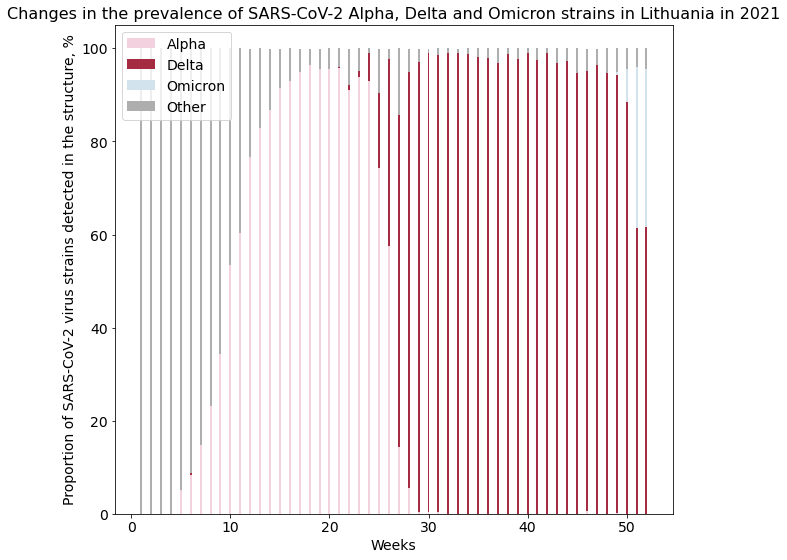

In [162]:
weeks = np.arange(1, 53)

# Graph
Alpha=((variants[variants['variant']=="B.1.1.7"])['percent_variant'].values)
Delta=((variants[variants['variant']=="B.1.617.2"])['percent_variant'].values)
Omicron=((variants[(variants['variant']=="BA.1") | (variants['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values)
Other=((variants[(variants['variant'] != "B.1.1.7") & (variants['variant'] != "B.1.617.2") & (variants['variant'] != "BA.1") & (variants['variant'] != "BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values)

fig, ax = plt.subplots()
ax.bar(weeks,Alpha, color='#f4d1df', label='Alpha', width=0.20)
ax.bar(weeks,Delta, color='#a52b43', label='Delta', width=0.20, bottom = Alpha)
ax.bar(weeks,Omicron, color='#d2e3ed', label='Omicron', width=0.20, bottom = Alpha+Delta)
ax.bar(weeks,Other, color='#afaeaf', label='Kita', width=0.20, bottom = Alpha+Delta+Omicron)
ax.set_ylabel('Proportion of SARS-CoV-2 virus strains detected in the structure, %', fontsize=14)
ax.set_xlabel('Weeks', fontsize=14)
ax.set_title('Changes in the prevalence of SARS-CoV-2 Alpha, Delta and Omicron strains in Lithuania in 2021', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(["Alpha", "Delta", "Omicron", "Other"] , fontsize=14)
fig.set_size_inches(10,9)
plt.show()

SECOND TASK

In [163]:
# A file with with data on confirmed cases of COVID-19 in Lithuania is opened

cases_all = pd.read_csv('atvejai.csv')

cases_all['date'] = pd.to_datetime(cases_all['date'], format='%Y/%m/%d')
cases_all['year'] = pd.DatetimeIndex(cases_all.date).year
cases_all['week_nr'] = pd.DatetimeIndex(cases_all.date).week
cases=cases_all[(cases_all['year']==2021) & (cases_all['week_nr']<=52)]

C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3065759771.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  cases_all['week_nr'] = pd.DatetimeIndex(cases_all.date).week


In [164]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143277 entries, 12152 to 303418
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   object_id          143277 non-null  int64         
 1   municipality_name  143277 non-null  object        
 2   date               143277 non-null  datetime64[ns]
 3   sex                143277 non-null  object        
 4   age_gr             143277 non-null  object        
 5   incidence          143277 non-null  int64         
 6   infection_1        143277 non-null  int64         
 7   infection_2        143277 non-null  int64         
 8   infection_3        143277 non-null  int64         
 9   infection_4        143277 non-null  int64         
 10  deaths_all         143277 non-null  int64         
 11  deaths_cov1        143277 non-null  int64         
 12  deaths_cov2        143277 non-null  int64         
 13  deaths_cov3        143277 non-null  int6

In [165]:
print(cases['sex'].unique())
print(cases['age_gr'].unique())

['Moteris' 'Vyras' 'Nenustatyta']
['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89'
 '90-99' 'Nenustatyta' '100-109' '110-119']


In [166]:
# Moteris = Female
# Vyras = Male
# Nenustatyta = not identified

In [167]:
# A file with data about the population of Lithuania is opened

population_2021=pd.read_excel(io='gyventojai2021.xls', sheet_name='Iš viso')
population_2021=population_2021.drop(population_2021.index[0:7])
population_2021=population_2021.drop(population_2021.index[2:])

# All population in Lithuania in 2021
popul_2021_all=population_2021.iloc[1,1]

#Population by age groups

#Age groups:
#0-9; 10-19; 20-29; 30-39; 49-49; 50-59; 60-69; 70-79; 80 y. and older.

under_9y=(population_2021.iloc[1, 2:12].sum())
from_10_to_19=(population_2021.iloc[1, 12:22].sum())
from_20_to_29=(population_2021.iloc[1, 22:32].sum())
from_30_to_39=(population_2021.iloc[1, 32:34].sum())
from_40_to_49=(population_2021.iloc[1, 34:36].sum())
from_50_to_59=(population_2021.iloc[1, 36:38].sum())
from_60_to_69=(population_2021.iloc[1, 38:40].sum())
from_70_to_79=(population_2021.iloc[1, 40:42].sum())
from_80_and_older=(population_2021.iloc[1, 42:44].sum())

#Population by sex
f_pop_2021=pd.read_excel(io='gyventojai2021.xls', sheet_name='Moterys')
f_pop_2021=f_pop_2021.drop(f_pop_2021.index[0:7])
f_pop_2021=f_pop_2021.drop(f_pop_2021.index[2:])

f_pop_2021=f_pop_2021.iloc[1,1]


m_pop_2021=pd.read_excel(io='gyventojai2021.xls', sheet_name='Vyrai')
m_pop_2021=m_pop_2021.drop(m_pop_2021.index[0:7])
m_pop_2021=m_pop_2021.drop(m_pop_2021.index[2:])

m_pop_2021=m_pop_2021.iloc[1,1]

Dynamics of the incidence of COVID-19 disease in Lithuania in 2021.

In [168]:
# The weekly morbidity of the population in Lithuania in 2021 is calculated
morbidity_LT2021=cases
morbidity_LT2021['week_nr1']=morbidity_LT2021['week_nr']
morbidity_LT2021=(morbidity_LT2021.groupby(['week_nr'], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"}))
morbidity_LT2021['weekly_morbidity']=(morbidity_LT2021['incidence']/popul_2021_all)*100000

C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\2127459839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morbidity_LT2021['week_nr1']=morbidity_LT2021['week_nr']


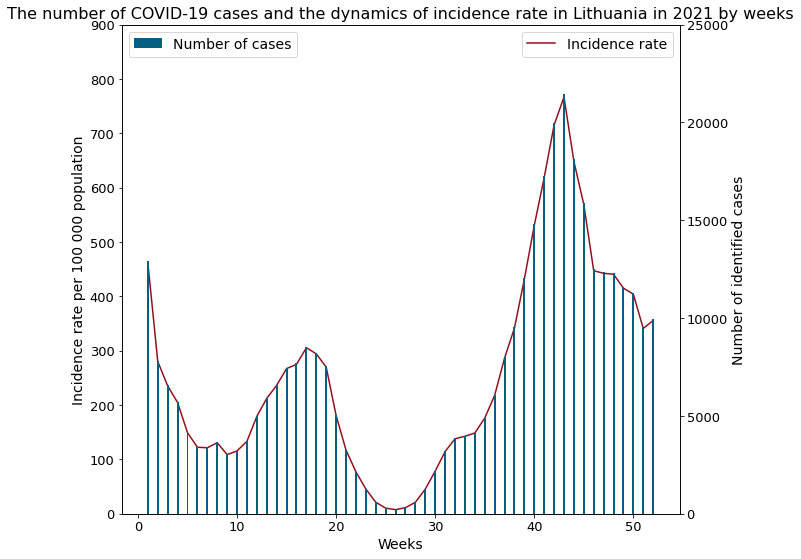

In [169]:
#Graph
fig, ax1 = plt.subplots()
ax1.plot(morbidity_LT2021['week_nr'].values, morbidity_LT2021['weekly_morbidity'].values, color='#920f1d')
ax1.set_ylabel('Incidence rate per 100 000 population', fontsize=14)
ax1.set_xlabel('Weeks', fontsize=14)
ax1.set_ylim(0, 900)
ax2=ax1.twinx()
ax2.bar(morbidity_LT2021['week_nr'].values, morbidity_LT2021['incidence'].values, color='#055f81', width=0.20)
ax2.set_ylabel('Number of identified cases', fontsize=14)
ax2.set_ylim(0, 25000)
ax1.set_title('The number of COVID-19 cases and the dynamics of incidence rate in Lithuania in 2021 by weeks', fontsize=16)
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax1.legend(['Incidence rate'] , fontsize=14, loc=1)
ax2.legend(['Number of cases'] , fontsize=14, loc=2)
fig.set_size_inches(10, 9)
plt.show()

Incidence by gender

In [170]:
cases2021MF=cases
cases2021MF["sex1"]=cases2021MF["sex"]
cases2021MF["week_nr1"]=cases2021MF["week_nr"]

cases2021MF=(cases2021MF[(cases2021MF["sex"]=="Vyras") | (cases2021MF["sex"]=="Moteris")]).groupby(["week_nr", "sex"], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"})

#Weekly incidence rates for men and women are calculated
cases2021MF["weekly_morbidity"]=np.where(cases2021MF.sex == "Moteris", (cases2021MF.incidence / f_pop_2021 *100000), (cases2021MF.incidence / m_pop_2021 *100000))

C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\2187434340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021MF["sex1"]=cases2021MF["sex"]
C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\2187434340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021MF["week_nr1"]=cases2021MF["week_nr"]


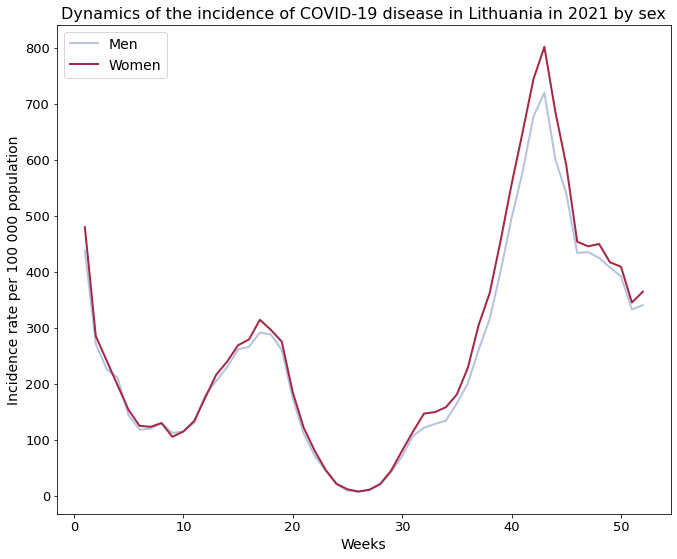

In [171]:
#Graph
fig, ax = plt.subplots()
ax.plot(((cases2021MF[cases2021MF['sex']=='Vyras'])['week_nr'].values), ((cases2021MF[cases2021MF['sex']=='Vyras'])['weekly_morbidity'].values), color='#b4c3e1', lw=2)
ax.plot(((cases2021MF[cases2021MF['sex']=='Moteris'])['week_nr'].values), ((cases2021MF[cases2021MF['sex']=='Moteris'])['weekly_morbidity'].values), color='#a52747', lw=2)
ax.set_title('Dynamics of the incidence of COVID-19 disease in Lithuania in 2021 by sex', fontsize=16)
ax.set_ylabel('Incidence rate per 100 000 population', fontsize=14)
ax.set_xlabel('Weeks', fontsize=14)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(['Men', "Women"] , fontsize=14, loc=2)
fig.set_size_inches(11,9)
plt.show()

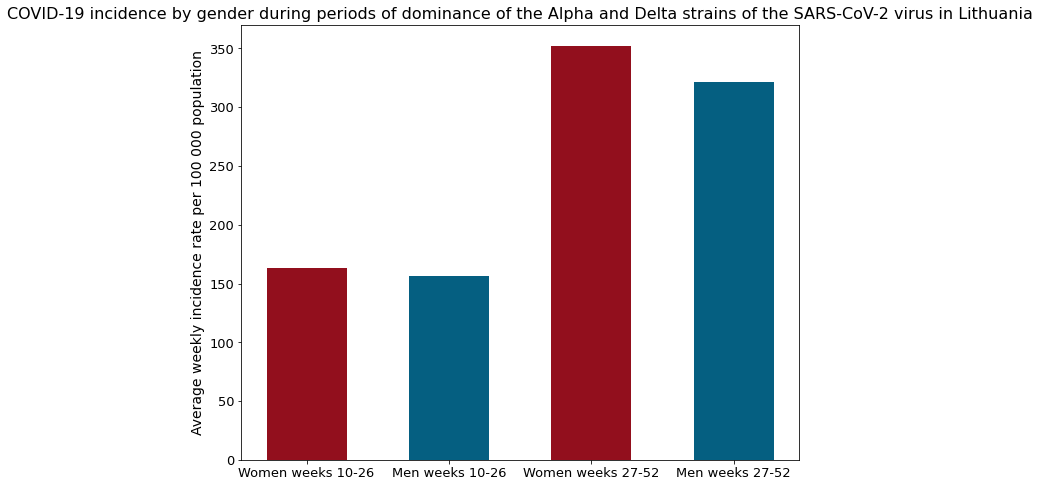

In [172]:
# Average weekly incidence rates during periods of dominance of the Alpha and Delta strains
Incidence_fem_Alpha=(cases2021MF[(cases2021MF['sex']=='Moteris') & (cases2021MF['week_nr'] >= 10) & (cases2021MF['week_nr'] <= 26)])["weekly_morbidity"].mean()
Incidence_mal_Alpha=(cases2021MF[(cases2021MF['sex']=='Vyras') & (cases2021MF['week_nr'] >= 10) & (cases2021MF['week_nr'] <= 26)])["weekly_morbidity"].mean()

Incidence_fem_Delta=(cases2021MF[(cases2021MF['sex']=='Moteris') & (cases2021MF['week_nr'] >= 27) & (cases2021MF['week_nr'] <= 52)])["weekly_morbidity"].mean()
Incidence_mal_Delta=(cases2021MF[(cases2021MF['sex']=='Vyras') & (cases2021MF['week_nr'] >= 27) & (cases2021MF['week_nr'] <= 52)])["weekly_morbidity"].mean()

# Graph
x= [1, 5, 9, 13]
y = [Incidence_fem_Alpha, Incidence_mal_Alpha, Incidence_fem_Delta, Incidence_mal_Delta]
spalvos = ["#920f1d", "#055f81", "#920f1d", "#055f81"]
fig, ax = plt.subplots()
ax.bar(x,y, color = spalvos, width = 2.25)
ax.set_xticks([1, 5, 9, 13])
ax.set_xticklabels(['Women weeks 10-26', 'Men weeks 10-26', 'Women weeks 27-52', 'Men weeks 27-52'], fontsize=14)
ax.set_title('COVID-19 incidence by gender during periods of dominance of the Alpha and Delta strains of the SARS-CoV-2 virus in Lithuania', fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_ylabel('Average weekly incidence rate per 100 000 population', fontsize=14)
fig.set_size_inches(10,8)
plt.show()

In [173]:
# Rate ratio is calculated

if Incidence_fem_Alpha > Incidence_mal_Alpha:
    print("In 2021 10-26 weeks the average weekly incidence rate for women was", (round((Incidence_fem_Alpha / Incidence_mal_Alpha), 2)), "times higher than for men.")
elif Incidence_fem_Alpha < Incidence_mal_Alpha:
    print("In 2021 10-26 weeks the average weekly incidence rate for men was", (round((Incidence_mal_Alpha / Incidence_fem_Alpha), 2)), "times higher than for women.")
else:
    print("In 2021 10-26 weeks there was no difference in average weekly morbidity between men and women.")

if Incidence_fem_Delta > Incidence_mal_Delta:
    print("In 2021 27-52 weeks the average weekly incidence rate for women was", (round((Incidence_fem_Delta / Incidence_mal_Delta), 2)), "times higher than for men.")
elif Incidence_fem_Delta < Incidence_mal_Delta:
    print("In 2021 27-52 weeks the average weekly incidence rate for men was", (round((Incidence_mal_Delta / Incidence_fem_Delta), 2)), "times higher than for women.")
else:
    print("In 2021 27-52 weeks there was no difference in average weekly morbidity between men and women.")

In 2021 10-26 weeks the average weekly incidence rate for women was 1.05 times higher than for men.
In 2021 27-52 weeks the average weekly incidence rate for women was 1.1 times higher than for men.


During the period of Alpha variant dominance rates ratio 1.05, 95 % CI 0,98; 1,11 p = 0,169 (calculated using WinPepi (version 11.65)).

During the period of Delta variant dominance rates ratio 1.1, 95 % CI 1,05; 1,14 p < 0,001 (calculated using WinPepi (version 11.65)).

Comparison of incidence rate in different age groups

In [174]:
cases2021_age=cases
#Age group are reconciled with the available data on the population from the Lithuanian Statistics Department
cases2021_age['age_gr']=cases2021_age['age_gr'].replace('80-89', '>=80')
cases2021_age['age_gr']=cases2021_age['age_gr'].replace('90-99', '>=80')
cases2021_age['age_gr']=cases2021_age['age_gr'].replace('100-109', '>=80')
cases2021_age['age_gr']=cases2021_age['age_gr'].replace('110-119', '>=80')


C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3057435104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021_age['age_gr']=cases2021_age['age_gr'].replace('80-89', '>=80')
C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3057435104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021_age['age_gr']=cases2021_age['age_gr'].replace('90-99', '>=80')
C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3057435104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [175]:
#Cases in each age group are grouped by week
cases2021_age['age_gr1']=cases2021_age['age_gr']
cases2021_age['week_nr1']=cases2021_age['week_nr']
cases2021_age=(cases2021_age[cases2021_age["age_gr"]!="Nenustatyta"]).groupby(["week_nr", "age_gr"], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"})

#Weekly incidence rate is calculated
cases2021_age['weekly_morbidity']=""

cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "0-9", (cases2021_age['incidence'] / under_9y *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "10-19", (cases2021_age['incidence'] / from_10_to_19 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "20-29", (cases2021_age['incidence'] / from_20_to_29 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "30-39", (cases2021_age['incidence'] / from_30_to_39 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "40-49", (cases2021_age['incidence'] / from_40_to_49 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "50-59", (cases2021_age['incidence'] / from_50_to_59 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "60-69", (cases2021_age['incidence'] / from_60_to_69 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == "70-79", (cases2021_age['incidence'] / from_70_to_79 *100000), cases2021_age['weekly_morbidity'])
cases2021_age['weekly_morbidity']=np.where(cases2021_age['age_gr'] == ">=80", (cases2021_age['incidence'] / from_80_and_older *100000), cases2021_age['weekly_morbidity'])


C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3253265510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021_age['age_gr1']=cases2021_age['age_gr']
C:\Users\valerija\AppData\Local\Temp\ipykernel_9036\3253265510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases2021_age['week_nr1']=cases2021_age['week_nr']


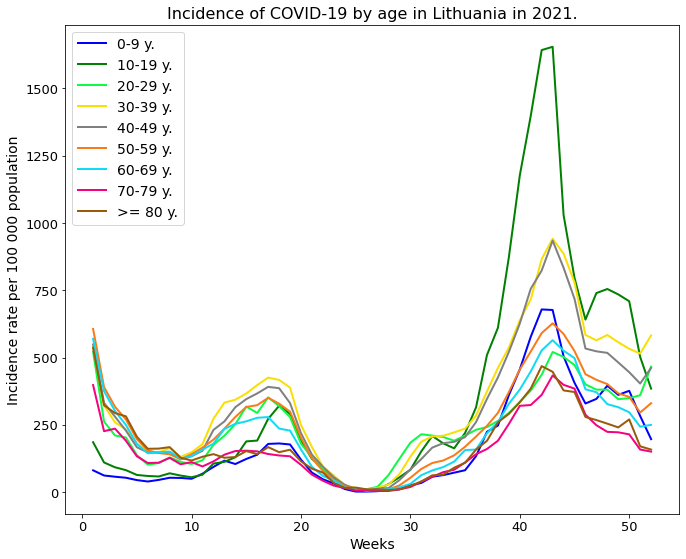

In [176]:
fig, ax = plt.subplots()


ax.plot(((cases2021_age[cases2021_age['age_gr']=='0-9'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='0-9'])['weekly_morbidity'].values), color='blue', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='10-19'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='10-19'])['weekly_morbidity'].values), color='green', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='20-29'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='20-29'])['weekly_morbidity'].values), color='#0EFA45', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='30-39'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='30-39'])['weekly_morbidity'].values), color='#FADF03', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='40-49'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='40-49'])['weekly_morbidity'].values), color='grey', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='50-59'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='50-59'])['weekly_morbidity'].values), color='#FA7A19', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='60-69'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='60-69'])['weekly_morbidity'].values), color='#0FDBF5', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='70-79'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='70-79'])['weekly_morbidity'].values), color='#F50280', lw=2)
ax.plot(((cases2021_age[cases2021_age['age_gr']=='>=80'])['week_nr'].values), ((cases2021_age[cases2021_age['age_gr']=='>=80'])['weekly_morbidity'].values), color='#995B09', lw=2)

ax.set_title("Incidence of COVID-19 by age in Lithuania in 2021.", fontsize=16)
ax.set_ylabel('Incidence rate per 100 000 population', fontsize=14)
ax.set_xlabel('Weeks', fontsize=14)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(['0-9 y.', '10-19 y.', '20-29 y.', '30-39 y.', '40-49 y.', '50-59 y.', '60-69 y.', '70-79 y.', '>= 80 y.'] , fontsize=14, loc=0)
fig.set_size_inches(11,9)
plt.show()

In [177]:
# Comparison of average weekly incidence rates for different age groups during Alpha dominance (10-26 weeks)

#the average weekly incidence rate for each age group is calculated
Alpha_under9=(cases2021_age[(cases2021_age['age_gr']=='0-9') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_10_19=(cases2021_age[(cases2021_age['age_gr']=='10-19') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_20_29=(cases2021_age[(cases2021_age['age_gr']=='20-29') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_30_39=(cases2021_age[(cases2021_age['age_gr']=='30-39') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_40_49=(cases2021_age[(cases2021_age['age_gr']=='40-49') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_50_59=(cases2021_age[(cases2021_age['age_gr']=='50-59') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_60_69=(cases2021_age[(cases2021_age['age_gr']=='60-69') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_70_79=(cases2021_age[(cases2021_age['age_gr']=='70-79') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()
Alpha_80and_older=(cases2021_age[(cases2021_age['age_gr']=='>=80') & (cases2021_age['week_nr'] >= 10) & (cases2021_age['week_nr'] <= 26)])["weekly_morbidity"].mean()

Alpha_inc_age={Alpha_under9:"0-9 y.", Alpha_10_19:"10-19 y.", Alpha_20_29:"20-29 y.", Alpha_30_39:"30-39 y.", Alpha_40_49:"40-49 y.", Alpha_50_59:"50-59 y.", Alpha_60_69:"60-69 y.", Alpha_70_79:"70-79 y.", Alpha_80and_older:"80 y. and older"}

#Highest and lowest incidence rate during Alpha dominance:
print("The highest incidence rate during the dominance of the Alpha strain was found in the", Alpha_inc_age.get(max(Alpha_inc_age)), "age group.")
print("The lowest incidence rate during the dominance of the Alpha strain was found in the", Alpha_inc_age.get(min(Alpha_inc_age)), "age group.")

# Comparison of average weekly incidence rates of different age groups during Delta dominance (27-52 weeks)

#the average weekly incidence rate for each age group is calculated
Delta_under9=(cases2021_age[(cases2021_age['age_gr']=='0-9') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_10_19=(cases2021_age[(cases2021_age['age_gr']=='10-19') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_20_29=(cases2021_age[(cases2021_age['age_gr']=='20-29') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_30_39=(cases2021_age[(cases2021_age['age_gr']=='30-39') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_40_49=(cases2021_age[(cases2021_age['age_gr']=='40-49') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_50_59=(cases2021_age[(cases2021_age['age_gr']=='50-59') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_60_69=(cases2021_age[(cases2021_age['age_gr']=='60-69') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_70_79=(cases2021_age[(cases2021_age['age_gr']=='70-79') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()
Delta_80and_older=(cases2021_age[(cases2021_age['age_gr']=='>=80') & (cases2021_age['week_nr'] >= 27) & (cases2021_age['week_nr'] <= 52)])["weekly_morbidity"].mean()

Vidut_sav_delta_amz={Delta_under9:"0-9 y.", Delta_10_19:"10-19 y.", Delta_20_29:"20-29 y.", Delta_30_39:"30-39 y.", Delta_40_49:"40-49 y.", Delta_50_59:"50-59 y.", Delta_60_69:"60-69 y.", Delta_70_79:"70-79 y.", Delta_80and_older:"80 y. and older"}

#Highest and lowest incidence rate during Delta dominance:
print("The highest incidence rate during the dominance of the Delta strain was found in the", Vidut_sav_delta_amz.get(max(Vidut_sav_delta_amz)), "age group.")
print("The lowest incidence rate during the dominance of the Delta strain was found in the", Vidut_sav_delta_amz.get(min(Vidut_sav_delta_amz)), "age group.")

The highest incidence rate during the dominance of the Alpha strain was found in the 30-39 y. age group.
The lowest incidence rate during the dominance of the Alpha strain was found in the 0-9 y. age group.
The highest incidence rate during the dominance of the Delta strain was found in the 10-19 y. age group.
The lowest incidence rate during the dominance of the Delta strain was found in the 70-79 y. age group.


In [178]:
print("During the period of dominance of the Alpha strain, the average weekly morbidity of persons aged 30-39 years was ", round(Alpha_30_39/Alpha_under9, 2), "times higher than that of 0-9 years aged persons.")
print("During the period of dominance of the Delta strain, the average weekly morbidity of persons aged 10-19 years was", round(Delta_10_19/Delta_70_79, 2), "times higher than that of 0-9 years aged persons.")

During the period of dominance of the Alpha strain, the average weekly morbidity of persons aged 30-39 years was  2.56 times higher than that of 0-9 years aged persons.
During the period of dominance of the Delta strain, the average weekly morbidity of persons aged 10-19 years was 3.2 times higher than that of 0-9 years aged persons.


During the period of Alpha variant dominance rates ratio 2.56, 95 % CI 2,06; 2,70 p < 0,001 (calculated using WinPepi (version 11.65)).

During the period of Delta variant dominance rates ratio 3.2, 95 % CI 2,83; 3,51 p < 0,001 (calculated using WinPepi (version 11.65)).

Conclusions:
1. In 2021 two variants of concern dominated in Lithuania.
The first case of COVID-19, caused by SARS-CoV-2 virus Alpha strain was identified during 2021 week 5, the dominance period was from week 10 to week 26.
The Delta strain was first identified in 2021 week 6, dominance period was from week 27 to week 52.
The Omicron strain was first identified in 2021 week 49 and in week 52 already accounted for a 33.9 % of all variants found in the country.
Other variants of concern (Beta and Gamma) were detected less frequently during the sequencing and did not spread widely in Lithuania.

2. In 2021 the incidence rates were higher in women than in men. During the period of dominance of the Delta strain, the incidence rates of women were also higher,
no difference was found during Alpha dominance. Incidence in different age groups varied according to the predominant strain.
During the dominance of the Alpha strain, the incidence rate was was higher in 30-39 years old persons, during Delta dominance - 10-19 years old age group.
